**Baixando matplotlib no kernel criado**
- Utiliza-se matplotlib para plotar graficamente os circuitos quânticos


In [1]:
import sys
!{sys.executable} -m pip install matplotlib

**Criar circuito quântico de 1 qubit**
- Portas parametrizadas RX e RY.
- Mede o valor esperado de PauliZ.

Resultado da medição: 0.3535533905932738
0: ──RX(0.79)──RY(1.05)─┤  <Z>


(<Figure size 500x200 with 1 Axes>, <Axes: >)

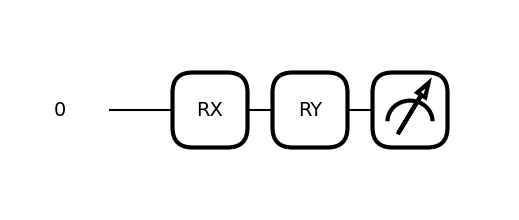

In [2]:
import pennylane as qml
from pennylane import numpy as np
# criação do dispositivo quântico com 1 qubit
dev = qml.device("default.qubit", wires=1)

#definir o circuito quântico (circuito + dispositivo)
@qml.qnode(dev)

def circuitos(angulos):
    # aplica rotação em X e depois em Y
    qml.RX(angulos[0], wires=0)
    qml.RY(angulos[1], wires=0)
    # retorna a expectativa do operador PauliZ (mede o estado do qubit)
    return qml.expval(qml.PauliZ(0))

# executar o circuito com parâmetros arbitrários
parametros = np.array([np.pi / 4, np.pi / 3], requires_grad=True)
resultado = circuitos(parametros)

print(f"Resultado da medição: {resultado}")
#desenhar o circuito quântico
print(qml.draw(circuitos)(parametros)) #circuito desenhado em ASCII
qml.draw_mpl(circuitos)(parametros) #circuito desenhado em matplotlib

**Hello World da Computação Quântica**
- Cria os estados de Bell (estados emaranhados de 2 qubits).
- mostra tanto vetor de estado quanto circuito quântico formado.


Bell state |Φ_0⟩: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
0: ──H─╭●─┤  State
1: ────╰X─┤  State
Bell state |Φ_1⟩: [ 0.70710678+0.j  0.        +0.j -0.        +0.j -0.70710678+0.j]
0: ──H─╭●──Z─┤  State
1: ────╰X────┤  State
Bell state |Φ_2⟩: [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
0: ──H─╭●────┤  State
1: ────╰X──X─┤  State
Bell state |Φ_3⟩: [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j -0.        +0.j]
0: ──H─╭●──Z─┤  State
1: ────╰X──X─┤  State


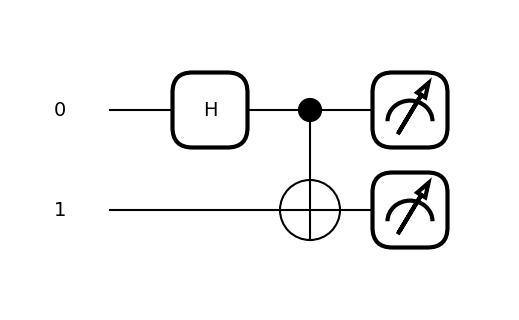

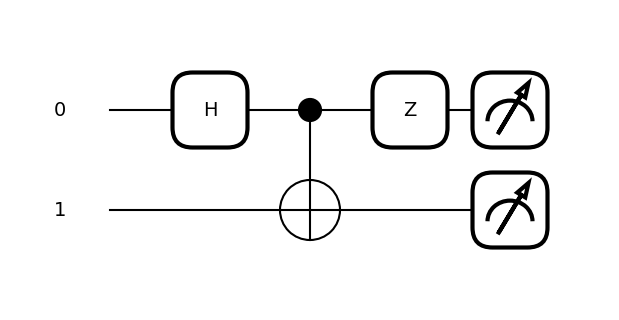

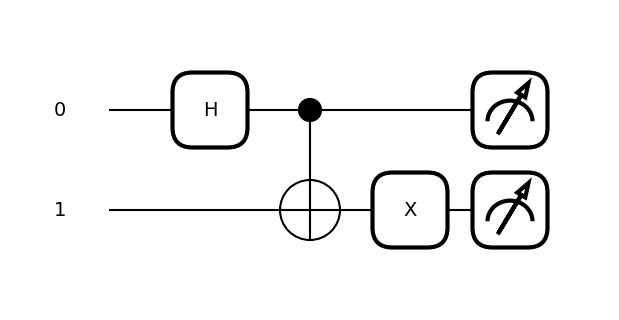

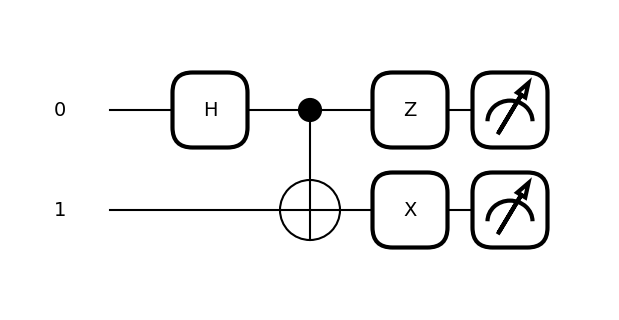

In [ ]:
import pennylane as qml
from pennylane import numpy as np
# criação do dispositivo quântico com 2 qubits
dev = qml.device("default.qubit", wires=2)

# Marca a função como QNode ligado ao dispositivo "dev"
# Um QNode é uma combinação de um circuito quântico e um dispositivo quântico que pode ser executado
@qml.qnode(dev)
def prepare_bell_state(index):
    qml.Hadamard(wires=0) # Hadamard no primeiro qubit cria superposição no |0⟩
    qml.CNOT(wires=[0, 1]) # CNOT entre o primeiro e o segundo qubit cria emaranhamento gerando o estado |Φ+⟩
    if index == 0:
        pass  # |Φ+⟩ já está preparado
    elif index == 1:
        qml.PauliZ(wires=0)  # altera o estado para |Φ-⟩ aplicando Z no primeiro qubit
    elif index == 2:
        qml.PauliX(wires=1)  # altera o estado para |Ψ+⟩ aplicando X no segundo qubit
    elif index == 3:
        # altera o estado para |Ψ-⟩ aplicando X no segundo qubit e Z no primeiro qubit
        qml.PauliX(wires=1)
        qml.PauliZ(wires=0)  
    # retorna o estado final dos qubits
    return qml.state()
# Loop para preparar e exibir os quatro estados de Bell
for i in range(4):
    bell_state = prepare_bell_state(i)
    # printa os estados de Bell
    print(f"Bell state |Φ_{i}⟩: {bell_state}")   
    # desenhar o circuito quântico em ASCII e matplotlib
    print(qml.draw(prepare_bell_state)(i))
    qml.draw_mpl(prepare_bell_state)(i)